In [1]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as a numerical example of evaluating Energy dissipated in FPZ. The trilinear stress opening relation is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

However, the parameters used in the bilinear softening curve can be evaluated by using formula by Xu. Hence,
\begin{gather*}
\sigma_s (CTOD_c) = \frac{f_t(2 - f_t \frac{CTOD_c}{G_f})}{\alpha_f} \\
w_1 = CTOD_c \\
w_0 = \alpha_f \frac{G_f}{f_t} \\
\alpha_f = \lambda - \frac{d_{max}}{8} \\
\end{gather*}
where, $f_t$ represents tensile strength that can be obtained by either splitting tests or by the formula $f_t = 0.4983 \sqrt f_c$ . Here, $G_f$, $\lambda$, $\alpha_f$ represents Fracture Energy, calibration factor, deformation coefficient of concrete respectively. Furthermore, $d_{max}$ depicts maximum size of coarse aggregate and $CTOD_c$ is the critical crack tip opening displacement which can be determined by replacing $x = a_0$ in the equation for $w_x$.

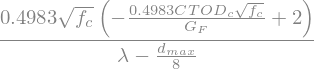

In [54]:
lamda = sp.Symbol(r'\lambda', nonnegative = True)
G_F = sp.Symbol('G_F', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
CTOD_c = sp.Symbol('CTOD_{c}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_{c}', nonnegative = True)
f_c = sp.Symbol('f_{c}', nonnegative = True)
w_1 = CTOD_c
f_t = 0.4983 * sp.sqrt(f_c)
alpha_f = lamda - d_max/8
w_2 = alpha_f * (G_f / f_t)
sigma_s = (f_t * (2 - f_t * (CTOD_c / G_F))) / alpha_f
sigma_s

### Calculating Stress for the trilinear stress opening curve


In [55]:
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol('w', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_0 = sp.Symbol('w_0', nonnegative = True)
a_c  = sp.Symbol('a_c', nonnegative = True)
a_0  = sp.Symbol('a_0', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
P_max = sp.Symbol('P_{max}', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)

### Critical Effective length
- Calculation of Critical Effective Length using:
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}
where, $C_{si}$ is the secant compliance at any crack propagation. The critical effective crack length $a_c$ can be derived by setting:
\begin{gather*}
C_{si}= \frac{CMOD_c}{P_{max}}
\end{gather*}

In [56]:
C_si = sp.Symbol('C_{si}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
lamda = sp.Symbol(r'\lambda', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
C_si = CMOD_c / P_max

In [57]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0 : 0.1, 
          CMOD_c : 0.15, 
          f_c : 45000, 
          lamda : 1, 
          d_max : 0.01,
          G_f : 100,
          CTOD_c : 0.2,
          pi : 3.14,
          G_F : 10
         }

In [58]:
C_si_ = C_si.subs(params)
C_si_

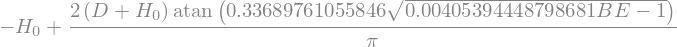

In [59]:
a_i = (2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si_)/(32.6)-0.1135)) - H_0
a_i

In [60]:
a_c = a_i.subs(params)
a_c

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}


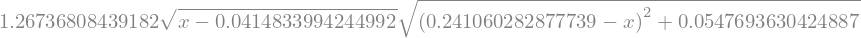

In [61]:
w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
wx_ = w_x.subs(params)
wx_

In [62]:
get_w_x = sp.lambdify((x), wx_, 'numpy')
get_w_x

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


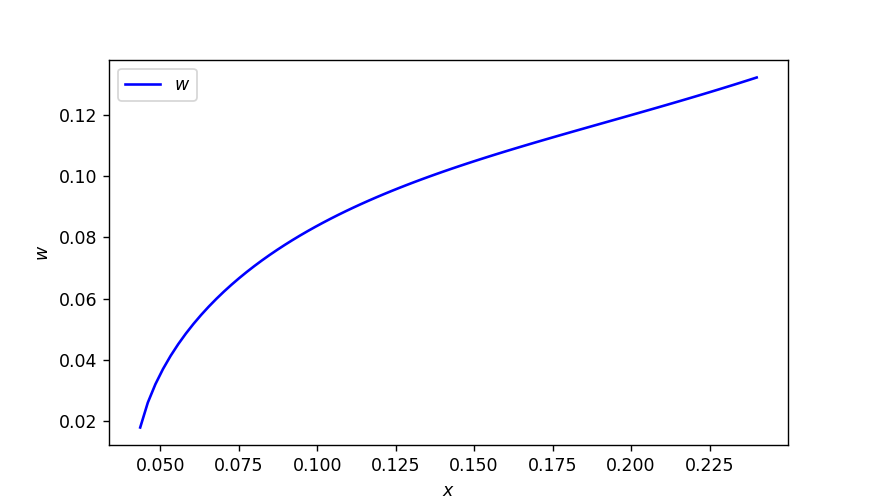

<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [63]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0, 0.24, 100)
w_x_rec = get_w_x(x_range) 
ax1.plot(x_range, w_x_rec, color='b', label = '$w$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$w$')
ax1.legend()

In [90]:
w_x_rec

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.01800514, 0.02611942,
       0.03214011, 0.03710269, 0.0413912 , 0.04519942, 0.04864172,
       0.05179244, 0.05470323, 0.0574118 , 0.05994671, 0.06233025,
       0.06458025, 0.06671126, 0.06873533, 0.07066263, 0.07250183,
       0.0742604 , 0.07594484, 0.07756086, 0.07911353, 0.08060737,
       0.08204641, 0.08343432, 0.08477442, 0.08606975, 0.08732307,
       0.08853695, 0.08971376, 0.09085568, 0.09196478, 0.09304295,
       0.094092  , 0.0951136 , 0.09610935, 0.09708075, 0.09802923,
       0.09895613, 0.09986274, 0.1007503 , 0.10161998, 0.1024729 ,
       0.10331015, 0.10413275, 0.10494172, 0.10573801, 0.10652255,
       0.10729623, 0.10805994, 0.1088145 , 0.10956073, 0.11029943,
       0.11103137, 0.11175728, 0.1124779 , 0.11319394, 0.11390

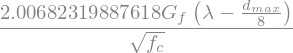

In [91]:
w_2 

In [92]:
w_1

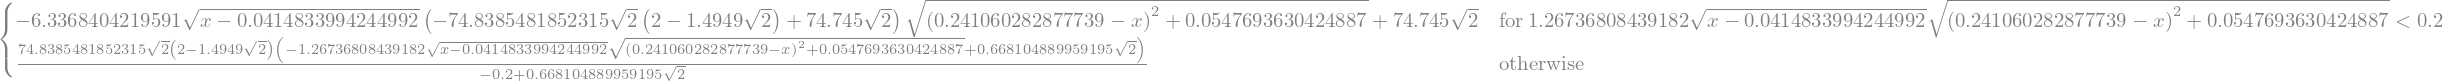

In [80]:
sigma_1 = f_t - (f_t - sigma_s) * (wx_ / w_1) 
sigma_2 = sigma_s * (w_2 - wx_) / (w_2 - w_1)
sigma = sp.Piecewise(
    (sigma_1.subs(params), wx_.subs(params)< w_1.subs(params)),
    (sigma_2.subs(params), True)
)
sigma

In [81]:
get_sigma = sp.lambdify((x), sigma, 'numpy')
get_sigma

<function _lambdifygenerated(x)>

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


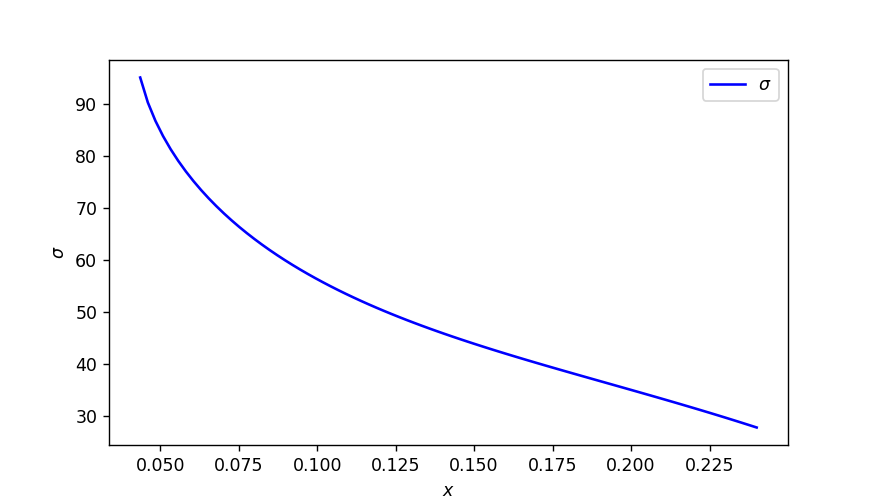

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in less


In [99]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0, 0.24, 100)
sigma_rec = get_sigma(x_range) 
ax1.plot(x_range, sigma_rec, color='b', label = '$\sigma$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$\sigma$')
ax1.legend()

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

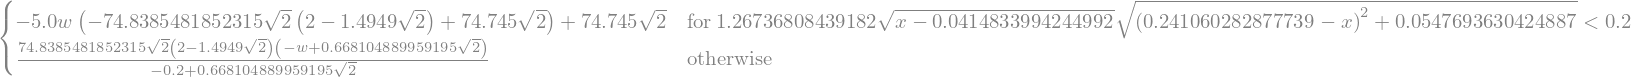

In [114]:
w = sp.Symbol('w', nonnegative = True)
sigma_1 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma = sp.Piecewise(
    (sigma_1.subs(params), wx_.subs(params)< w_1.subs(params)),
    (sigma_2.subs(params), True)
)
sigma

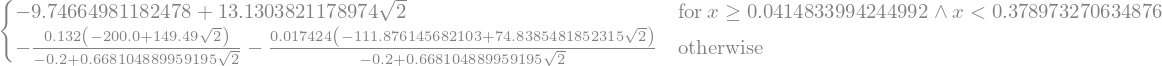

In [115]:
g = sp.integrate(sigma, (w, 0, 0.132))
g

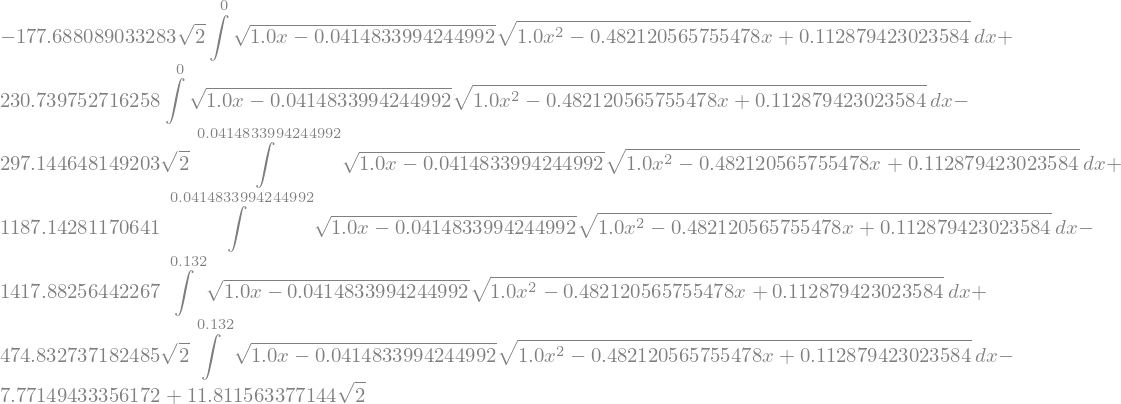

In [96]:
g_ = sp.simplify(g)
g_

In [118]:
get_g = sp.lambdify((x), g, 'numpy')
get_g

<function _lambdifygenerated(x)>

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


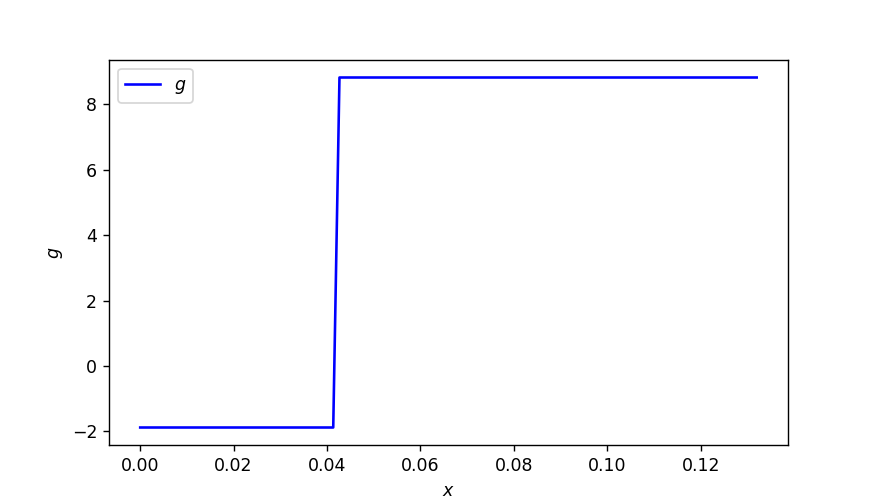

In [119]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0, 0.132, 100)
g_rec = get_g(x_range) 
ax1.plot(x_range, g_rec, color='b', label = '$g$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$g$')
ax1.legend()

In [ ]:
G_Ic = (1/(a_c - a_0)) * sp.integrate(sp.integrate( sigma,(w, 0, w)),(x, a_0.subs(params), a_c.subs(a_c, a_c_)))
G_Ic_ = sp.simplify(G_Ic)
G_Ic_

In [ ]:
CMOD = np.array([0, 0.02, 0.05, 0.13, 0.15, 0.16, 0.5, 0.73])
P =  np.array([0, 1.8, 4, 7.56, 10, 8, 4, 1.8])
 

In [ ]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
ax1.plot(CMOD, P, lw =2, color = 'b')
ax1.set_xlabel('$CMOD_c$'); ax1.set_ylabel(r'$P_{max}$')
ax1.legend()

In [ ]:
get_sigma = sp.lambdify((x),sigma.subs(params).subs(w, w_x_), 'numpy')
sigma.subs(params).subs(w, w_x_)

In [ ]:
G_I_c_ =G_Ic_.subs(params).subs(w, w_x_)
get_G_Ic= sp.lambdify((x), G_I_c_, 'numpy')
G_I_c_

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

In [ ]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol(r'P', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
G_un = sp.simplify((3*P_max**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
alpha_ = (a + H_0) / (D + H_0)
alpha_
G_un_ = G_un.subs(alpha,alpha_).subs(params).subs(a,x)
G_un_

In [ ]:
get_G_un = sp.lambdify((x), G_un_, 'numpy')
get_G_un

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

In [ ]:
G_un_mat = sp.Matrix([G_un_, G_un_, G_un_])
G_ini = G_un_mat - G_I_c_
G_ini;

In [ ]:
get_G_ini = sp.lambdify((x), G_ini, 'numpy')
get_G_ini

In [ ]:
def get_response(x=1, n_steps=8): 
    w_x_rec, G_c_rec, G_un_rec, G_ini_rec = [], [], [], [] 
    x_ = np.linspace(0.1,x,n_steps+1)
    for x_a in x_:
        w_x = get_w_x(x_a)
        G_c = get_G_Ic(x_a)
        G_un = get_G_un(x_a)
        G_ini = get_G_ini(x_a)
        w_x_rec.append(w_x)
        print(G_c_rec)
        G_c_rec.append(G_c)
        G_un_rec.append(G_un)
        G_ini_rec.append(G_ini)
    return (
        x_, np.array(w_x_rec,dtype=np.float_),
        np.array(G_c_rec,dtype=np.float_),
        np.array(G_un_rec,dtype=np.float_),
        np.array(G_ini_rec,dtype=np.float_)
    )

In [ ]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
x = 1
for n_step, color in zip(n_step_range, colors):
    x_, w_x_arr, G_c_arr, G_un_arr, G_ini_arr = get_response(x,n_step) 
    ax1.plot(w_x_arr[:], G_c_arr[:,0,0], color='g', 
         label='$G^{c}$')
    ax1.plot(w_x_arr[:], G_un_arr[:], color='b', 
         label='$G^{un}$')
    ax1.plot(w_x_arr[:], G_ini_arr[:,0,0], color='r', 
         label='$G^{ini}$')
    ax1.set_xlabel(r'$w$'); ax1.set_ylabel(r'$G$')
    ax1.legend()